# Априорное распределение в нашем случае - это Бета-распределение с параметрами alpha && beta

In [3]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
counter = 0
colors = ["red", "green", "magenta", "yellow", "blue", "purple", "pink", "gray", "black", "brown"] # size = 10
def draw_beta(alpha, beta) :
    global counter
    x = np.linspace(0,1,50)
    y = sps.beta.pdf(x, alpha, beta)
    plt.plot(x, y, color = colors[counter%10])
    counter+=1


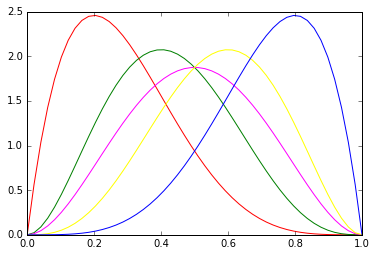

In [50]:
draw_beta(2,5)
draw_beta(3,4)
draw_beta(3,3)
draw_beta(4,3)
draw_beta(5,2)

# Генерируем выборку для разных p, и строим байесовские с разными параметрами, максимально правдоподобные оценки, сравниваем их.

In [67]:
def draw_verisimilitude(p) :
    return 0
def draw_bayes(alpha, beta) :
    return 0

for p in [0.1, 0.25, 0.5, 0.75, 0.9] :
    draw_verisimilitude(p)
    for alpha, beta in [(2,5), (3,3), (5,2)] :
        draw_bayes(alpha, beta)
    plt.show()